In [1]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing 
%run Funciones_CSPSA_SPSA.ipynb
%matplotlib inline

In [2]:
# Dimension estado d
d = 2
nu_par = 1


# Numero de iteraciones
NU_IT = 700


# Parametros Hamiltoniano

A = 1
B = 3
C = 5


# Definir estado

psi_est = estado(d,nu_par)


# Definir Hamiltoniano

H = H_paul(A,B,C)


# Funcion Valor de Expectacion

fun = lambda x : exp_H(x, H)


# Ground-state Teórico

Ground_teo = -(np.sqrt(A**2 + B**2 + C**2))

In [3]:
# Ganancias asintoticas [s, t, b]

gan0 = [1, 0.166,0.1]
gan1 = [1, 0.166,0.01]


# Ganancias estandar [s, t, b]

gan2 = [0.602, 0.101,0.1]
gan3 = [0.602, 0.101,0.01]

Gan = [gan0, gan1, gan2, gan3]

a = 3
A1 = 0

In [4]:
# Estados en el ensamble

num = 300


x = range(0,num)
y = len(x)

In [5]:
def calculo_ensamble(i):
    
    Result_CSPSA_ar = np.empty((0,1,NU_IT), dtype=np.longdouble)
    Result_SPSA_ar = np.empty((0,1,NU_IT), dtype=np.longdouble)
    Result_SPSA_ang_ar = np.empty((0,1,NU_IT), dtype=np.longdouble)

    error_CSPSA_ar = np.empty((0,1,NU_IT), dtype=np.longdouble)
    error_SPSA_ar = np.empty((0,1,NU_IT), dtype=np.longdouble)
    error_SPSA_ang_ar = np.empty((0,1,NU_IT), dtype=np.longdouble)
     
    psi_est = estado(d,nu_par)
    Result_CSPSA = CSPSA(psi_est, NU_IT, fun, fun, s, t, a, A1, b)
    Result_SPSA = SPSA(psi_est, NU_IT, fun, fun, s, t, a, A1, b)
    Result_SPSA_ang = SPSA_ang(psi_est, NU_IT, fun, fun, s, t, a, A1, b)
    
    error_CSPSA = abs(Result_CSPSA - Ground_teo)
    error_SPSA = abs(Result_SPSA - Ground_teo)
    error_SPSA_ang = abs(Result_SPSA_ang - Ground_teo)
    
    Result_CSPSA_ar = np.insert(Result_CSPSA_ar, 0, Result_CSPSA, axis=0)
    Result_SPSA_ar = np.insert(Result_SPSA_ar, 0, Result_SPSA, axis=0)
    Result_SPSA_ang_ar = np.insert(Result_SPSA_ang_ar, 0, Result_SPSA_ang, axis=0)
    
    error_CSPSA_ar = np.insert(error_CSPSA_ar, 0, error_CSPSA, axis=0)
    error_SPSA_ar = np.insert(error_SPSA_ar, 0, error_SPSA, axis=0)
    error_SPSA_ang_ar = np.insert(error_SPSA_ang_ar, 0, error_SPSA_ang, axis=0)
    
    return Result_CSPSA_ar, Result_SPSA_ar, Result_SPSA_ang_ar, error_CSPSA_ar, error_SPSA_ar, error_SPSA_ang_ar

In [6]:
def ord_res(p):
    
    # Ordenar resultados

    Results = np.array(p)

    Result_CSPSA_ar = Results[:,0,:,:,:]
    Result_SPSA_ar = Results[:,1,:,:,:]
    Result_SPSA_ang_ar = Results[:,2,:,:,:]

    error_CSPSA_ar = Results[:,3,:,:,:]
    error_SPSA_ar = Results[:,4,:,:,:]
    error_SPSA_ang_ar = Results[:,5,:,:,:]
    
    # Calculo de promedios

    Result_CSPSA_pro = np.sum(Result_CSPSA_ar, axis=0)/y
    Result_SPSA_pro = np.sum(Result_SPSA_ar, axis=0)/y
    Result_SPSA_ang_pro = np.sum(Result_SPSA_ang_ar, axis=0)/y

    error_CSPSA_pro = np.sum(error_CSPSA_ar, axis=0)/y
    error_SPSA_pro = np.sum(error_SPSA_ar, axis=0)/y
    error_SPSA_ang_pro = np.sum(error_SPSA_ang_ar, axis=0)/y

    Result_CSPSA = Result_CSPSA_pro[0,0,:]
    Result_SPSA = Result_SPSA_pro[0,0,:]
    Result_SPSA_ang = Result_SPSA_ang_pro[0,0,:]
    
    error_CSPSA = error_CSPSA_pro[0,0,:]
    error_SPSA = error_SPSA_pro[0,0,:]
    error_SPSA_ang = error_SPSA_ang_pro[0,0,:]
    
    return error_CSPSA, error_SPSA, error_SPSA_ang, Result_CSPSA, Result_SPSA, Result_SPSA_ang

In [7]:
Loop = []
for ganancia in Gan:
    s = ganancia[0]
    t = ganancia[1]
    b = ganancia[2]
    if __name__ == '__main__':
        pool = multiprocessing.Pool(2)
        p = pool.map(calculo_ensamble, x, 2)
        pool.close()
        pool.join()
    p = np.array(p)
    Loop.append(p)

In [8]:
Resultados = []
for i in range(0,len(Gan)):
    R = np.array(Loop[i])
    Resultado = ord_res(R)
    Resultados.append(Resultado)

In [9]:
g0 = Resultados[0]
a0 = a
b0 = gan0[2]

g1 = Resultados[1]
a1 = a
b1 = gan1[2]

g2 = Resultados[2]
a2 = a
b2 = gan2[2]

g3 = Resultados[3]
a3 = a
b3 = gan3[2]


asin = str('Asintoticas')
stan = str('Estandar')

In [10]:
def graf_errores(g0, g1, g2, tipo, gan_a, gan_b):
    plt.loglog(np.array(g0).T, label='CSPSA')
    plt.loglog(np.array(g1).T, label='SPSA')
    plt.loglog(np.array(g2).T, label='SPSA_ang')
    plt.ylabel('Error')
    plt.xlabel('Iteraciones')
    plt.title('Ganancias_' + tipo + ', a='+ str(gan_a) +', b=' + str(gan_b))
    plt.legend()
    plt.grid()
    plt.savefig(tipo +'Errores_a=' + str(gan_a) + '_b=' + str(gan_b) + '.png')

In [11]:
def graf_E0(g3, g4, g5, tipo, gan_a, gan_b):
    plt.plot(np.array(g3).T,label='CSPSA')
    plt.plot(np.array(g4).T, label='SPSA')
    plt.plot(np.array(g5).T, label='SPSA_ang')
    plt.ylabel('Ground State')
    plt.xlabel('Iteraciones')
    plt.title('Ganancias_' + tipo + ', a='+ str(gan_a) +', b=' + str(gan_b))
    plt.legend()
    plt.grid()
    plt.savefig(tipo +'Ground State_a=' + str(gan_a) + '_b=' + str(gan_b) + '.png')

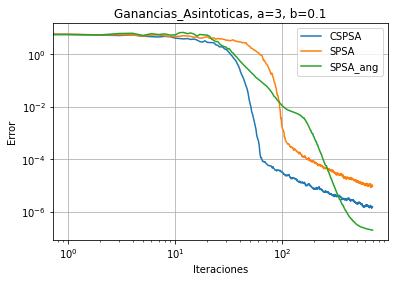

In [12]:
graf_errores(g0[0], g0[1], g0[2], asin, a0, b0)

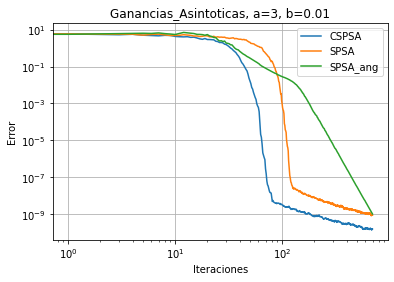

In [13]:
graf_errores(g1[0], g1[1], g1[2], asin, a1, b1)

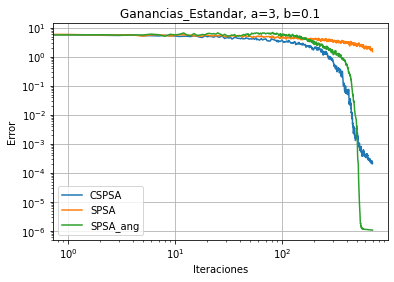

In [14]:
graf_errores(g2[0], g2[1], g2[2], stan, a2, b2)

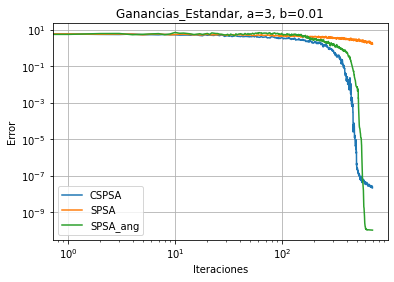

In [15]:
graf_errores(g3[0], g3[1], g3[2], stan, a3, b3)

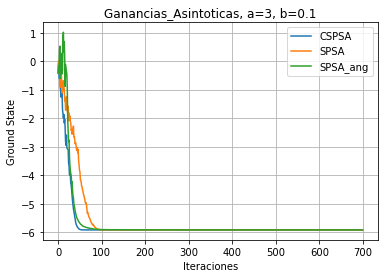

In [16]:
graf_E0(g0[3], g0[4], g0[5], asin, a0, b0)

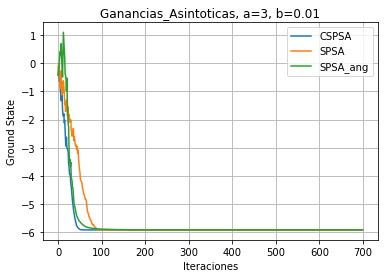

In [17]:
graf_E0(g1[3], g1[4], g1[5], asin, a1, b1)

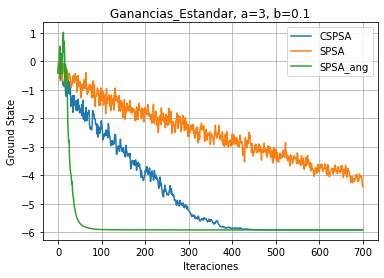

In [18]:
graf_E0(g2[3], g2[4], g0[5], stan, a2, b2)

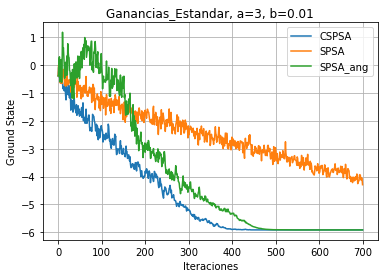

In [19]:
graf_E0(g3[3], g3[4], g3[5], stan, a3, b3)